<a href="https://colab.research.google.com/github/Saloni1707/TrainModel/blob/main/RidgeLassoRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Ridge Regression Algorithm

In [ ]:
from sklearn.linear_model import Ridge ##Overfitting ko avoid krna keliye
from sklearn.model_selection import GridSearchCV
import numpy as np
import pandas as pd
import seaborn as sns


In [ ]:
ridge_regression = Ridge()
ridge_regression

Ridge()

In [ ]:
dataset = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/chicago_taxi_train.csv")

Read dataset completed successfully
Total number of rows:31694




,TRIP_MILES,TRIP_SECONDS,FARE,COMPANY,PAYMENT_TYPE,TIP_RATE
count,31694.000000,31694.000000,31694.000000,31694,31694,31694.000000
unique,NaN,NaN,NaN,31,7,NaN
top,NaN,NaN,NaN,Flash Cab,Credit Card,NaN
freq,NaN,NaN,NaN,7887,14142,NaN
mean,8.289463,1319.796397,23.905210,NaN,NaN,12.965785
std,7.265672,928.932873,16.970022,NaN,NaN,15.517765
min,0.500000,60.000000,3.250000,NaN,NaN,0.000000
25%,1.720000,548.000000,9.000000,NaN,NaN,0.000000
50%,5.920000,1081.000000,18.750000,NaN,NaN,12.200000
75%,14.500000,1888.000000,38.750000,NaN,NaN,20.800000


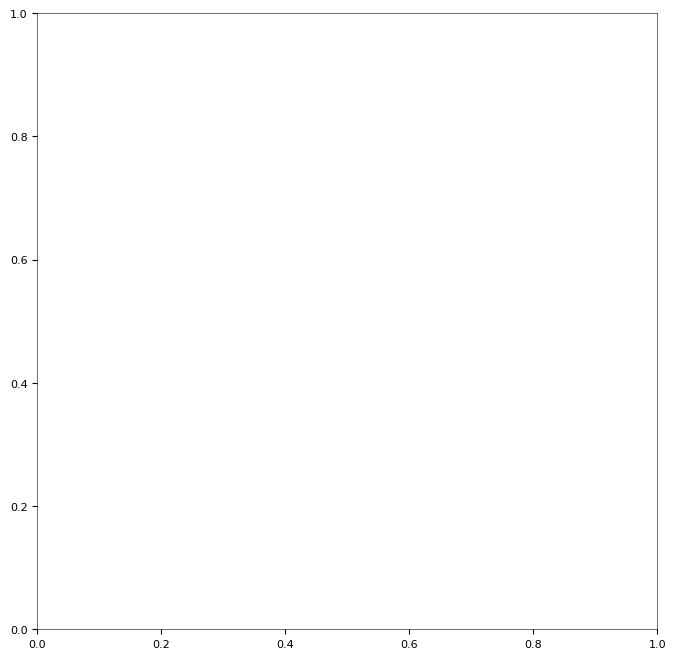

In [ ]:
training_df = dataset.loc[:,('TRIP_MILES','TRIP_SECONDS','FARE','COMPANY','PAYMENT_TYPE','TIP_RATE')]
print("Read dataset completed successfully")
print("Total number of rows:{0}\n\n".format(len(training_df)))
training_df.describe(include='all')

In [ ]:

# 2. One-hot encode COMPANY and PAYMENT_TYPE
df_encoded = pd.get_dummies(training_df, columns=['COMPANY', 'PAYMENT_TYPE'], drop_first=True)

# 3. Split features and target
X = df_encoded.drop(columns=['FARE'])
y = df_encoded['FARE']

# 4. Ridge regression with GridSearchCV
ridge_regression = Ridge()
parameter = {'alpha': [1, 2, 3, 4, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90]}
ridgecv = GridSearchCV(ridge_regression, parameter, scoring='neg_mean_squared_error', cv=5)
ridgecv.fit(X=X, y=y)

# 5. Best alpha
print("Best alpha:", ridgecv.best_params_)


Best alpha: {'alpha': 90}


In [ ]:
print(ridgecv.best_score_) ##best possible lowest mean squared error found during cv

-12.644710833975463


In [ ]:
ridge_pred = ridgecv.predict(X)
print(ridge_pred)

[15.90972348  9.19843934  9.49102283 ... 29.85810459 82.93386794
 83.18325166]


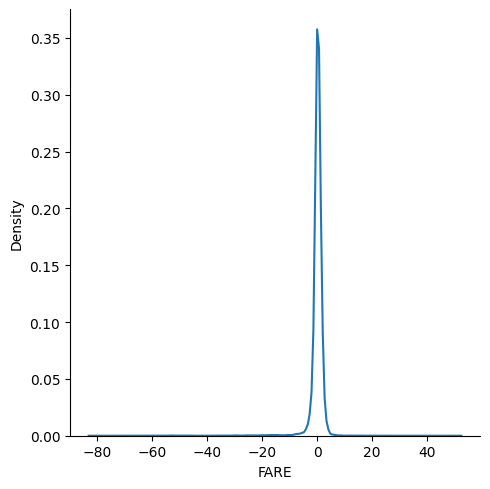

In [ ]:
residuals = ridge_pred - y
sns.displot(residuals,kind='kde')

count    3.169400e+04
mean     7.532730e-15
std      3.424053e+00
min     -8.172340e+01
25%     -3.987890e-01
50%      2.575929e-01
75%      8.899419e-01
max      5.110259e+01
Name: FARE, dtype: float64


<Axes: xlabel='FARE', ylabel='Count'>

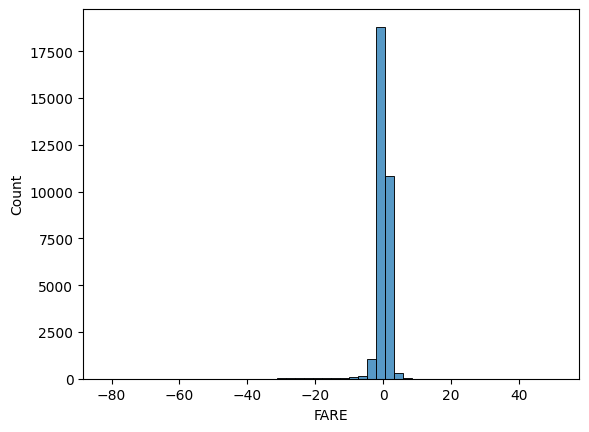

In [ ]:
print(residuals.describe())
sns.histplot(residuals, bins=50)


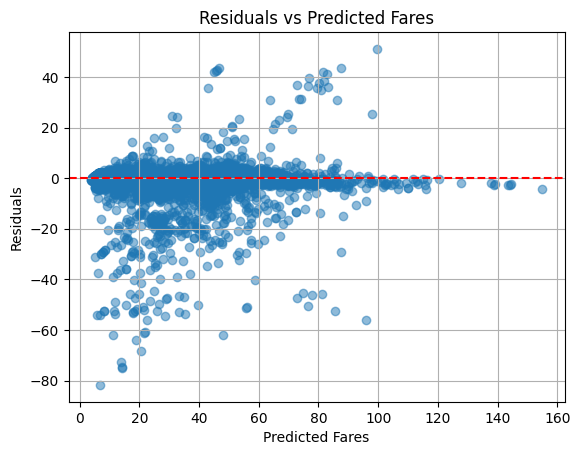

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(ridge_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Fares")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Fares")
plt.grid(True)
plt.show()
